# Introduction
Hello! This a text analysis of the lyrics of some of my favorite rappers. I have always appreciated witty lines and superior storytelling in my music over sick beats. Let's see what the data can tell us about the verse I love so much.

# Data Description

I built a web scrapper to extract lyrics from the following artists and albums from https://genius.com/. This scraper is designed to extract lyrics from all pieces in a listed album (including interludes and skits). Here are the albums and artists I looked at

|  Eminem | The Weeknd | Chance The Rapper | 
|---|---|---|
|Revival (2017) | Starboy (2016) | Coloring Book (2016)| 
|The Marshall Mathers LP2 (2013)| Beauty Behind the Madness (2015) | Acid Rap (2013)|
| Recovery(2010) | Kiss Land (2013)| 10 Day (2012) | 
| Relapse (2009) | Trilogy (2012) |
| Curtain Call (2005) |
| Encore (2004) |
| The Eminem Show (2002) |
| The Marshall Mathers LP (2000) |


| Kendrick Lamar| Childish Gambino | Frank Ocean | 
|---|---|---|
|DAMN. (2017)|Awaken, My Love! (2016)| Blonde (2016) |
|untitled unmastered  (2016)| Kauai (2014)| Endless (2016) |
| To Pimp a Butterfly (2015) | Because the Internet (2013) | Unreleased misc (2013) | 
| Compton State of Mind (2014)| Camp (2011) | Channel Orange (2012) | 
| Good kid M.A.A.D city (2012) |
| Section 80 (2011) | 
| Overly Dedicated (2010)| 


| Drake | Kanye West |
|---|---|
|More Life (2017) |The Life of Pablo (2016) |
| Views (2016) |Yeezus (2013)|
|If You're Reading This It's Too Late (2015)  | My Beautiful Dark Twisted Fantasy (2010) |
| Nothing Was the Same (2013) | 808s Heartbreak (2008) |
| Take Care (2011) | Graduation (2007) |
| Thank Me Later (2010) | Late Registration (2005) |
|  | The College Dropout (2004) |



# EDA (Exploratory Data Analysis aka 

`For the full scraper check out the Data folder in the repository`

Whew! So we now have a wealth of information. Let's see what the data looks like

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/cleaned_data.csv",index_col = 0)
#simple data cleaning for each line
df.Lyrics = df.Lyrics.map(lambda lyric: lyric.replace("\r\r\n",""))
d

(715, 7)


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as senti 
from nltk.tokenize import sent_tokenize
analyzer = senti()
scores = df.Lyrics.map(lambda x: [analyzer.polarity_scores(y) for y in sent_tokenize(str(x))])
df['AvgPositive'] = scores.map(lambda x: sum([item['pos'] - item['neg'] for item in x])/len(x))
df['NormPositive'] = df.AvgPositive.map(lambda x: (x - df.AvgPositive.mean())/df.AvgPositive.std())

C:\Users\Ali Prasla\Anaconda2\envs\ipykernel_py3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


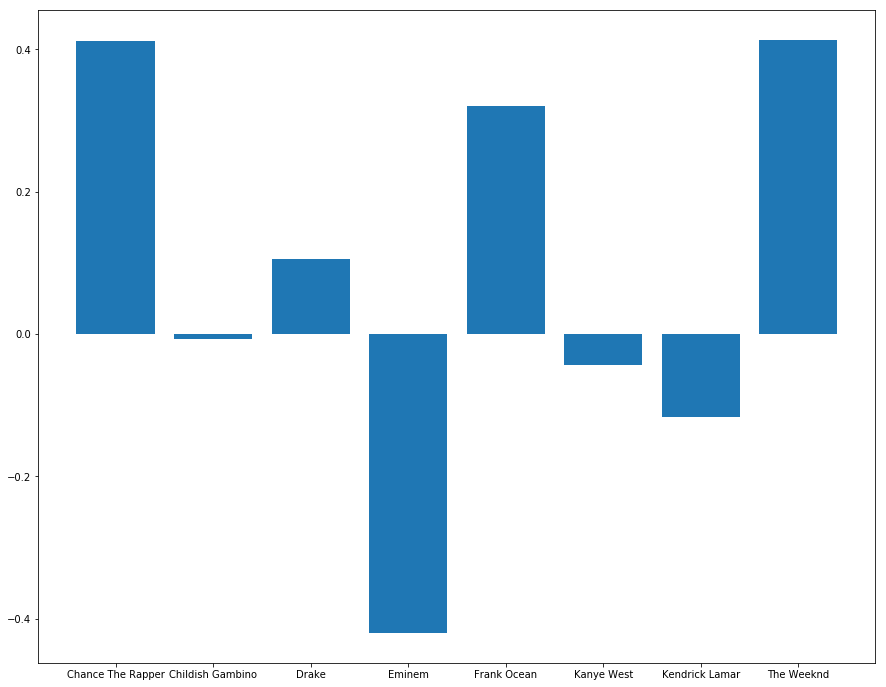

In [48]:
mean_senti = df.groupby('Artist')['NormPositive'].mean()
mean_senti = mean_senti.sort_values()
labels = mean_senti.index
vals = mean_senti.values
plt.figure(figsize = (15,12))
plt.bar(labels,mean_senti)

In [49]:
bottom = df.groupby(['Artist','AlbumName'])['NormPositive'].mean().sort_values()[0:10]
top = df.groupby(['Artist','AlbumName'])['NormPositive'].mean().sort_values(ascending = False)[0:10]
selected = top.append(bottom)
selected.index = [x[0] + ' - ' + x[1] for x in list(selected.index)]
selected.sort_values()

Eminem - The Marshall Mathers LP                 -0.862793
Eminem - The Marshall Mathers LP2                -0.576971
Kanye West - Yeezus                              -0.535213
Eminem - Curtain Call the hits                   -0.498930
Eminem - Encore                                  -0.450959
Kanye West - My Beautiful Dark Twisted Fantasy   -0.436685
Kendrick Lamar - Section 80                      -0.348062
Eminem - The Eminem Show                         -0.347035
Kendrick Lamar - Overly Dedicated                -0.313394
Drake - Nothing Was the Same                     -0.273841
Childish Gambino - Awaken my love                 0.288880
Drake - Thank Me Later                            0.293294
Frank Ocean - Channel Orange                      0.319039
Drake - More Life                                 0.358448
The Weeknd - Trilogy                              0.407294
Drake - Views                                     0.560992
The Weeknd - Beauty Behind the Madness            0.5638

In [50]:
album_artist.Artist.unique()

NameError: name 'album_artist' is not defined

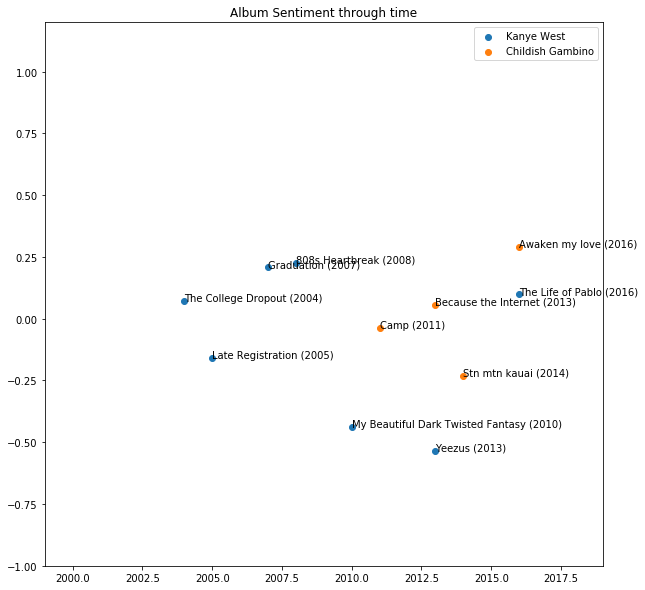

In [55]:
album_artist = df.groupby(['AlbumName','Artist','Year'])['NormPositive'].mean()
album_artist = album_artist.reset_index()
album_artist.columns = ['AlbumName','Artist','Year','AverageNormPositive']
fig = plt.figure(figsize =(10,10) )
ax = fig.add_subplot(111)
plot_artist = ['Kanye West','Childish Gambino']
for artist in plot_artist:
    current = album_artist[album_artist.Artist == artist]
    plt.scatter(current.Year,current.AverageNormPositive)
    for Title, Year, Senti in zip(list(current.AlbumName.values),list(current.Year.values),list(current.AverageNormPositive.values)):
        ax.annotate(Title + " ("+str(Year)+")",xy = (Year,Senti),textcoords='data')
    plt.legend(plot_artist)
    plt.ylim(-1,1.2)
    plt.title('Album Sentiment through time')
    plt.xlim(1999,2019)
plt.show()

In [6]:
import numpy as np
def is_int(item):
    try:
        i = int(item)
        return True
    except:
        return False

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
l = WordNetLemmatizer()
s = EnglishStemmer()
stop_words = set(stopwords.words('english'))
useless = ["n't",",","'","(",")","'s","'ll","[","]","?"]
words = df.Lyrics.map(lambda x:' '.join(list(filter(lambda y: y not in stop_words and y not in useless and not is_int(y),[s.stem(l.lemmatize(y)) for y in word_tokenize(x)]))))


In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
df.index = range(0,len(df))
vec = TfidfVectorizer(analyzer = 'word',stop_words = 'english',lowercase = True)
dtm = vec.fit_transform(words)
feature_names = vec.get_feature_names()
text_data = StandardScaler().fit_transform(dtm.toarray())
#compress text_data into albums
text_df = pd.DataFrame(text_data)
text_df['Artist'] = df.Artist
text_df['AlbumName'] = df.AlbumName
text_df = text_df.groupby(['Artist','AlbumName']).mean()
text_df.reset_index(inplace = True)
text_data_index = text_df[['Artist','AlbumName']]
text_data = text_df.drop(['Artist','AlbumName'],axis = 1).as_matrix()
text_df = None
dtm = None

In [233]:
def add_index_to_results(index,compressed):
    mod_df = index
    mod_df['Comp1'] = compressed[:,0]
    mod_df['Comp2'] = compressed[:,1]
    return mod_df

In [234]:
#Sparse PCA dimensionality reduction into two dimensions
sPca = SparsePCA(n_components = 2,alpha = 1)
sparce_pca = sPca.fit_transform(text_data)
sparce_pca = add_index_to_results(text_data_index,sparce_pca)

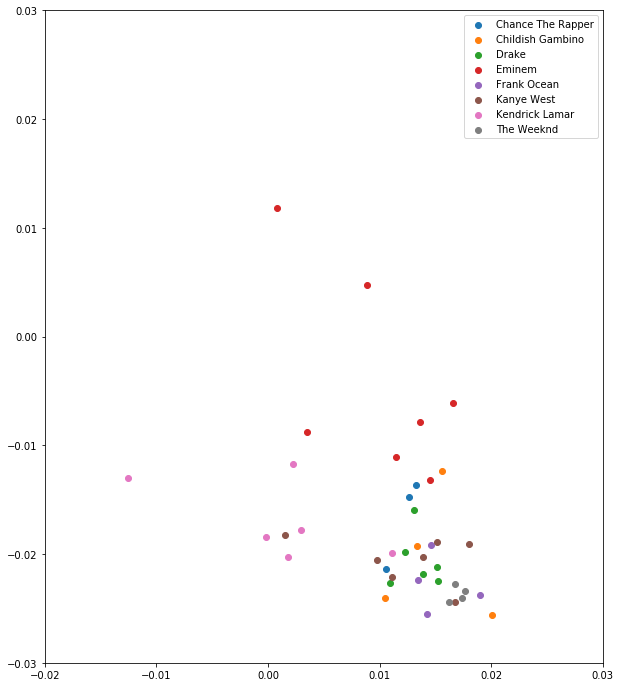

In [253]:
#aggregate by artist
def plot_albums(transformed_with_index,xlim = (-.02,.03),ylim = (-.03,.03)):
    plt.figure(figsize = (10,12))
    for artist in transformed_with_index.Artist.unique():
        plt.scatter(transformed_with_index[transformed_with_index.Artist == artist].Comp1,transformed_with_index[transformed_with_index.Artist == artist].Comp2)
        plt.legend(transformed_with_index.Artist.unique())
        plt.xlim(xlim)
        plt.ylim(ylim)
plot_albums(sparce_pca)

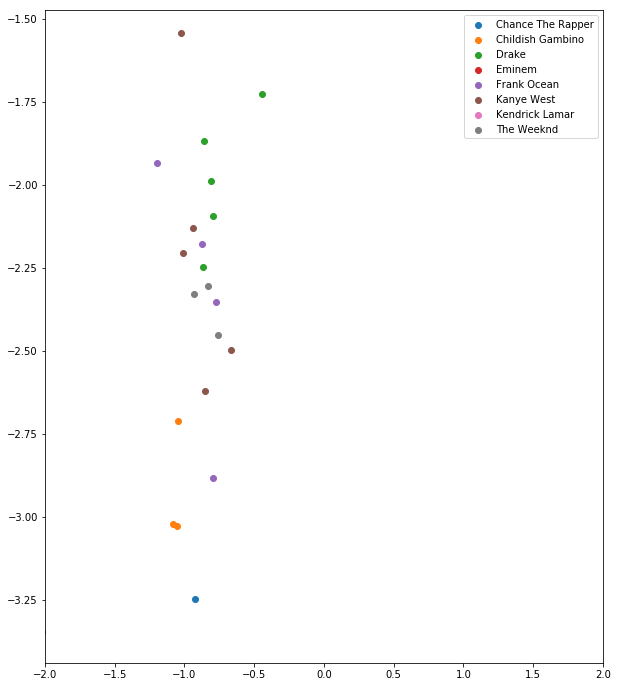

In [258]:
plot_albums(add_index_to_results(text_data_index,simple_pca_data),xlim = (-2,2),ylim = None)

In [255]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(text_data)
var = pca.explained_variance_ratio_
simple_pca_data = pca.transform(text_data)

In [190]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 100,n_components = 2,early_exaggeration = 2,n_iter_without_progress = 500)
tSne_data = tsne.fit_transform(text_data)

(-0.01, 0.02)

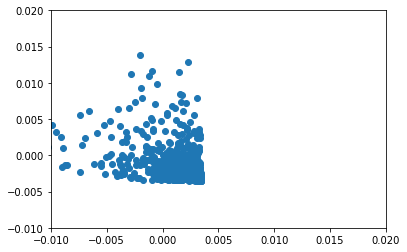

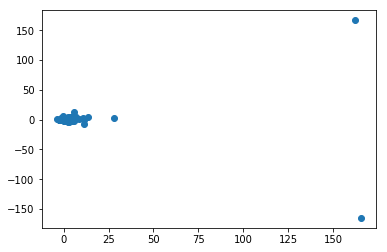

In [101]:
plt.scatter(simple_pca_data[:,0],simple_pca_data[:,1])

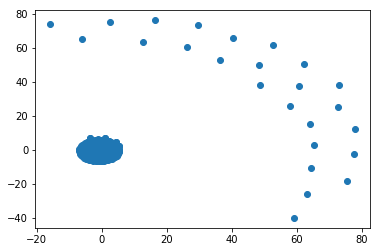

In [112]:
plt.scatter(tSne_data[:,0],tSne_data[:,1])

[[  1.00000000e+00   8.90019936e-04   3.05884525e-02]
 [  8.90019936e-04   1.00000000e+00  -2.02803449e-02]
 [  3.05884525e-02  -2.02803449e-02   1.00000000e+00]]


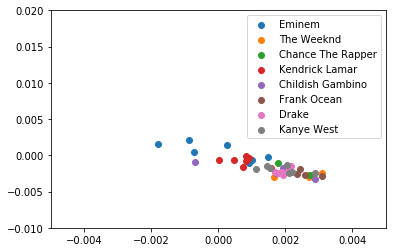

In [212]:
def return_df_2d_text_space(orig_df,compressed_matrix):
    mod_df = orig_df
    mod_df['Comp1'] = pd.Series(compressed_matrix[:,0])
    mod_df['Comp2'] = pd.Series(compressed_matrix[:,1])
    return mod_df


with_low_dim = return_df_2d_text_space(df,sparce_pca)
with_low_dim_avg = with_low_dim.groupby(['Artist','AlbumName'])[['Comp1','Comp2']].mean()
with_low_dim_avg = with_low_dim_avg.reset_index()
for artist in with_low_dim.Artist.unique():
    plt.scatter(with_low_dim_avg[with_low_dim_avg.Artist == artist].Comp1,with_low_dim_avg[with_low_dim_avg.Artist == artist].Comp2)
    plt.legend(with_low_dim.Artist.unique())
    plt.xlim(-.005,.005)
    plt.ylim(-.01,.02)

In [207]:
help(df.unstack)

Help on method unstack in module pandas.core.frame:

unstack(level=-1, fill_value=None) method of pandas.core.frame.DataFrame instance
    Pivot a level of the (necessarily hierarchical) index labels, returning
    a DataFrame having a new level of column labels whose inner-most level
    consists of the pivoted index labels. If the index is not a MultiIndex,
    the output will be a Series (the analogue of stack when the columns are
    not a MultiIndex).
    The level involved will automatically get sorted.
    
    Parameters
    ----------
    level : int, string, or list of these, default -1 (last level)
        Level(s) of index to unstack, can pass level name
    fill_value : replace NaN with this value if the unstack produces
        missing values
    
        .. versionadded: 0.18.0
    
    See also
    --------
    DataFrame.pivot : Pivot a table based on column values.
    DataFrame.stack : Pivot a level of the column labels (inverse operation
        from `unstack`).
    

array([[ 1.        ,  0.33866182, -0.04817809],
       [ 0.33866182,  1.        , -0.01379755],
       [-0.04817809, -0.01379755,  1.        ]])

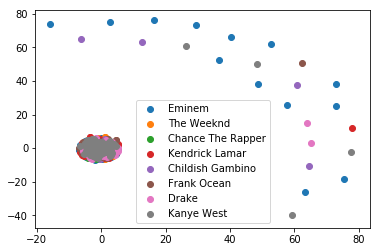

(715, 11)